# ARIM情報活用講座：　ケモインフォマテックス 編　
# 有機太陽電池材料編



## Polymer:NFA データセット
Polymer:NFA data setは、大阪大学・佐伯教授らの総説論文[1,2]で公開されている文献から収集した非フラーレンアクセプター（NFA）系有機太陽電池材料のデータセットです。ここには2011年～2021年にかけて発表された558報の論文から、有機太陽電池の研究に検討された有機半導体のHOMO/LUMO レベルやエネルギーギャップ（Eg） の報告値（実験値）のほか、1318の太陽電池素子の特性であるエネルギー変換効率（PCE)、短絡電流密度（Jsc)、曲線因子（FF）、開放端電圧（Voc）がまとめられています。

[1]の総説では、プログラムとしてRを用い、機械学習モデルにはRandom forest (RF) を適用した検討が述べられています。ポリマー/ドナーのフィンガープリントはECFP6およびMordred（2次元因子のみを使用）の二つのケースについて考察されています。

---
[1] Yuta Miyake and Akinori Saeki　"Machine Learning-Assisted Development of Organic Solar Cell Materials: Issues, Analyses, and Outlooks", J. Phys. Chem. Lett. 2021, 12, 51, 12391–12401 (2021) https://pubs.acs.org/doi/10.1021/acs.jpclett.1c03526

[2] Kakaraparthi Kranthiraja, Akinori Saeki  "Experiment-Oriented Machine Learning of Polymer:Non-Fullerene Organic Solar Cells". Adv. Funct. Mater. 2021, 31, 2011168. https://doi.org/10.1002/adfm.202011168

[3] 佐伯昭紀、"塗布型太陽電池材料のマテリアルズ・インフォマティクス"、化学と工業、Vol.76-6　 (2023) https://www.chemistry.or.jp/journal/ci23p374.pdf

---

【Polymer:NFA 変数一覧（特徴量）】
1. **ID**　　　　 ：　素子ID　	
1. **Ref**　　　　：  参照論文番号（参照論文の文献は[1]による） 
1. **PCE_max(%)** ：　エネルギー変換効率の最大値	
1. **PCE_ave(%)** ：　エネルギー変換効率の平均値
1. **Jsc(mA/cm2)**:  短絡電流密度
1. **FF**　　　　　：　曲線因子（Fill Factor）
1. **Voc(V)**　　　：　開放端電圧
1. **HOMO_n(eV)** ：　有機n型半導体(NFA型)の最高被占分子軌道（HOMO）エネルギー	
1. **LUMO_n(eV)** ：　有機n型半導体(NFA型)の最低空分子軌道 (LUMO)エネルギー	
1. **Eg_n(eV)**	  ：　有機n型半導体(NFA型)のバンドギャップ
1. **n(SMILES)**  ：　有機n型半導体（NFA型）のSMILES構造	
1. **M (g/mol)**  ：　有機n型半導体（NFA型）の分子量	
1. **HOMO_p(eV)** ：　有機p型半導体（ポリマー）の最高被占分子軌道（HOMO）エネルギー		
1. **LUMO_p(eV)** ：　有機p型半導体（ポリマー）の最低空分子軌道 (LUMO)エネルギー		
1. **Eg_p(eV)**	  ：　有機p型半導体（ポリマー）のバンドギャップ
1. **p(SMILES)**  ：　有機p型半導体（ポリマー）のSMILES構造
1. **Mw (kg/mol)**:  ポリマーの重量平均分子量
1. **Mn(kg/mol)** ：　ポリマーの数平均分子量　	
1. **PDI**　　　　：　ポリマーの分散度　

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [1]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Training/Training_python_6.git
%cd Training_python_6

[WinError 2] 指定されたファイルが見つかりません。: 'Training_python_6'
C:\Users\Matsunami\Dropbox\9_GitHub_python\ARIM_python_6


Cloning into 'Training_python_6'...
error: unable to write symref for HEAD: Permission denied
fatal: unable to update HEAD


## 1.分子構造データの読み込み

### 汎用ライブラリのインポート

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# 警告を無視
from warnings import filterwarnings
filterwarnings('ignore')

### データセットファイルの読み込み
ここでは「data」フォルダーにあるNFA_dataset.txtをpandasの`read_csv()`からデータフレーム（DataFrame）オブジェクトとして変数dfに格納します。NFA_dataset.txtはタブ区切り型のファイル（TSV）であるため、`read_csv()`ではオプションのdelimiterで`'\t'`を指定して読み込みます。

dfは1318の素子構造に対して19の特徴量からなるデータ行列となっていることが確かめられます。
19の特徴量のカラム名の意味は冒頭に記載してあります。

In [2]:
df = pd.read_csv('./data/NFA_dataset.txt',delimiter='\t')
df

,ID,Ref,PCE_max(%),PCE_ave(%),Jsc(mA/cm2),FF,Voc(V),'-HOMO_n(eV),'-LUMO_n(eV),Eg_n(eV),n(SMILES),M (g/mol),'-HOMO_p(eV),'-LUMO_p(eV),Eg_p(eV),p(SMILES),Mw (kg/mol),Mn(kg/mol),PDI
0,1,1,6.93,6.86,16.35,0.500,0.865,5.67,3.89,1.76,O=c(c1=Cc2sc(c3ccc(c4c5cc(c6sc(C=c(c(=O)c7c8cc...,1019.38,5.15,3.31,1.84,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,97.5,46.4,2.10
1,2,1,3.09,2.98,10.31,0.380,0.794,5.68,3.92,1.76,O=c(c1=Cc2sc(c3ccc(c4c5cc(c6sc(C=c(c(=O)c7c8cc...,1031.21,5.15,3.31,1.84,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,97.5,46.4,2.10
2,3,2,8.33,8.12,15.28,0.690,0.790,5.54,3.84,1.70,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,1427.96,5.45,3.56,1.89,CC1=CC2=C(S1)C(C3=CC=C(CC(CC)CCCC)S3)=C4C(OC(C...,41.1,21.4,1.92
3,4,3,8.67,8.35,14.00,0.579,1.070,5.51,3.88,1.63,O=C(/C(S1)=C/C(C2=NSN=C32)=CC=C3C(S4)=CC5=C4C6...,1326.02,5.46,3.69,1.77,CC1=CC2=C(S1)C(C3=CC=C(SCCCCCCCC)S3)=C4C(OC(C5...,42.8,16.4,2.61
4,5,4,8.46,8.33,13.95,0.601,1.010,5.48,3.83,1.65,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,1427.96,5.47,3.61,1.86,O=C(C1=C(C2=C(SC(C3=CC4=C(S3)C(C5=CC(Cl)=C(S5)...,87.5,44.0,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,1314,557,13.19,13.09,18.62,0.738,0.960,5.74,3.90,1.84,O=C(C(C=CC=C1)=C1C/2=C(C#N)\C#N)C2=C/C(S3)=CC4...,1011.40,5.54,2.98,2.56,FC1=C(C2=CC=C(C)S2)C3=NC(OCC(CCCCCC)CCCCCCCC)=...,82.1,39.1,2.10
1314,1315,558,2.15,2.08,6.59,0.410,0.770,5.66,4.14,1.52,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,1499.92,5.29,3.39,1.90,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,5.3,3.5,1.50
1315,1316,558,10.10,9.78,16.26,0.650,0.930,5.66,4.14,1.52,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,1499.92,5.45,3.58,1.87,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,38.9,11.8,3.30
1316,1317,558,3.97,3.67,7.81,0.510,0.950,5.66,4.14,1.52,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,1499.92,5.47,3.55,1.92,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,20.2,8.8,2.30


### 有機半導体の構造の可視化

In [3]:
n = df['n(SMILES)'][0]
n

'O=c(c1=Cc2sc(c3ccc(c4c5cc(c6sc(C=c(c(=O)c7c8cccc7)c8=C(C#N)C#N)cc6)cc4)c(C5(CCCCCCCCCC)CCCCCCCCCC)c3)cc2)c(cccc9)c9c1=C(C#N)C#N'

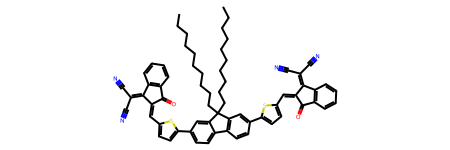

In [4]:
n_mol_0 =  Chem.MolFromSmiles(n)
n_mol_0

In [5]:
p = df['p(SMILES)'][0]
p

'CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C(OCC(CCCC)CC)C(SC(C)=C5)=C5C(OCC(CCCC)CC)=C4S3)S1'

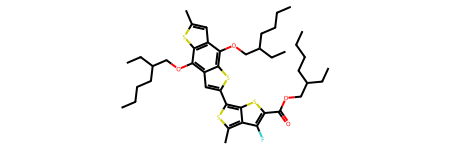

In [6]:
p_mol_0 =  Chem.MolFromSmiles(p)
p_mol_0

### n型/p型有機半導体のmolオブジェクト化
1318素子のn型/p型のSMILES構造からMolオブジェクトを作成します。ここでは、 ['n(SMILES)']列に`MolFromSmiles`関数を適用して新しく生成したmolオブジェクトを['n(mol)']のデータフレームとして追加し、同じく ['p(SMILES)']列に`MolFromSmiles`関数を作用させて['p(mol)']としてデータフレームに追加します。これら一連の作業はapply関数を利用すると、次の２行で処理が行われます。

In [9]:
df['n(mol)']=df['n(SMILES)'].apply(Chem.MolFromSmiles)
df['p(mol)']=df['p(SMILES)'].apply(Chem.MolFromSmiles)

[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[07:36:41] Explicit valence for atom # 37 N, 4, is greater than permitted
[07:36:41] Explicit valence for atom # 53 N, 4, is greater than permitted
[07:36:41] Explicit valence for atom # 47 C, 5, is greater than permitted
[07:36:41] Explicit valence for atom # 38 C, 5, is greater than permitted
[07:36:41] Explicit valence for atom #

上記で「Explicit valence for atom # 89 N, 4, is greater than permitted」などのエラーが出ています。このエラーメッセージは、分子の特定の原子の明示的な価数（explicit valence）が許容される範囲を超えていることを示しています。

原子の価数（valence）は、その原子が他の原子と結合することができる最大の数を表します。通常、価数は原子の元素種によって決まります。たとえば、窒素（N）の価数は通常3です。価数が超過すると、その原子は不正な結合を持つことになり、化学的に不安定な状態になります。

「Explicit valence for atom # 89 N, 4, is greater than permitted」のエラーメッセージが表示された場合、おそらく分子中の89番目の原子（N）の価数が4以上に設定されているか、または不正な結合がある可能性があります。

ここでは、このような不適合な化合物を含んでいるものはMolオブジェクト化せきずに「None」と表示されるため、次のdropna()メソッドから削除します。

In [10]:
df_rev = df.dropna()
df_rev

,ID,Ref,PCE_max(%),PCE_ave(%),Jsc(mA/cm2),FF,Voc(V),'-HOMO_n(eV),'-LUMO_n(eV),Eg_n(eV),...,M (g/mol),'-HOMO_p(eV),'-LUMO_p(eV),Eg_p(eV),p(SMILES),Mw (kg/mol),Mn(kg/mol),PDI,n(mol),p(mol)
0,1,1,6.93,6.86,16.35,0.500,0.865,5.67,3.89,1.76,...,1019.38,5.15,3.31,1.84,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,97.5,46.4,2.10,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
1,2,1,3.09,2.98,10.31,0.380,0.794,5.68,3.92,1.76,...,1031.21,5.15,3.31,1.84,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,97.5,46.4,2.10,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
2,3,2,8.33,8.12,15.28,0.690,0.790,5.54,3.84,1.70,...,1427.96,5.45,3.56,1.89,CC1=CC2=C(S1)C(C3=CC=C(CC(CC)CCCC)S3)=C4C(OC(C...,41.1,21.4,1.92,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
3,4,3,8.67,8.35,14.00,0.579,1.070,5.51,3.88,1.63,...,1326.02,5.46,3.69,1.77,CC1=CC2=C(S1)C(C3=CC=C(SCCCCCCCC)S3)=C4C(OC(C5...,42.8,16.4,2.61,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
4,5,4,8.46,8.33,13.95,0.601,1.010,5.48,3.83,1.65,...,1427.96,5.47,3.61,1.86,O=C(C1=C(C2=C(SC(C3=CC4=C(S3)C(C5=CC(Cl)=C(S5)...,87.5,44.0,1.99,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,1314,557,13.19,13.09,18.62,0.738,0.960,5.74,3.90,1.84,...,1011.40,5.54,2.98,2.56,FC1=C(C2=CC=C(C)S2)C3=NC(OCC(CCCCCC)CCCCCCCC)=...,82.1,39.1,2.10,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...
1314,1315,558,2.15,2.08,6.59,0.410,0.770,5.66,4.14,1.52,...,1499.92,5.29,3.39,1.90,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,5.3,3.5,1.50,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...
1315,1316,558,10.10,9.78,16.26,0.650,0.930,5.66,4.14,1.52,...,1499.92,5.45,3.58,1.87,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,38.9,11.8,3.30,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...
1316,1317,558,3.97,3.67,7.81,0.510,0.950,5.66,4.14,1.52,...,1499.92,5.47,3.55,1.92,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,20.2,8.8,2.30,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...


In [11]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1317
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1295 non-null   int64  
 1   Ref           1295 non-null   int64  
 2   PCE_max(%)    1295 non-null   float64
 3   PCE_ave(%)    1295 non-null   float64
 4   Jsc(mA/cm2)   1295 non-null   float64
 5   FF            1295 non-null   float64
 6   Voc(V)        1295 non-null   float64
 7   '-HOMO_n(eV)  1295 non-null   float64
 8   '-LUMO_n(eV)  1295 non-null   float64
 9   Eg_n(eV)      1295 non-null   float64
 10  n(SMILES)     1295 non-null   object 
 11  M (g/mol)     1295 non-null   float64
 12  '-HOMO_p(eV)  1295 non-null   float64
 13  '-LUMO_p(eV)  1295 non-null   float64
 14  Eg_p(eV)      1295 non-null   float64
 15  p(SMILES)     1295 non-null   object 
 16  Mw (kg/mol)   1295 non-null   float64
 17  Mn(kg/mol)    1295 non-null   float64
 18  PDI           1295 non-null 

## 2. 分子フィンガープリント

分子フィンガープリントは、列挙型のフィンガープリント記述子として**ECFP（Extended-Connectivity Fingerprint）**および**Mordred**を用いています。 ここではECFPフィンガープリントを計算してみましょう。分子フィンガープリントの計算はXenonPyを使います。

### XenonPyによるECFP計算
n型/p型有機半導体のそれぞれについてECFPフィンガープリントを計算します。ビット数を1024，半径をR=3とします。
まずはじめに、`xenonpy.descriptor`にある`ECFP`モジュールをインポートします。ECFP6の場合、RDKitのECFPは半径3相当であることから、引数のradiusとしては3を渡します。

In [12]:
from xenonpy.descriptor import ECFP

fp = ECFP(radius=3, n_bits=1024, input_type='smiles', return_type='df')

解説:

1. `fp_fcn = ECFP(radius=3, n_bits=1024, input_type='smiles', return_type='df')`: `ECFP`のインスタンスを作成し、`fp_fcn`という変数に代入します。このインスタンスは、指定されたパラメータに基づいて分子の指紋を計算します。

   - `radius=3`: フィンガープリントを計算するための半径の範囲を指定します。この場合、半径3の範囲内に存在する結合パターンが考慮されます。
   
   - `n_bits=1024`: 生成される指紋のビット数を指定します。ここでは、1024ビットの指紋が生成されます。
   
   - `input_type='smiles'`: 入力データの形式を指定します。ここでは、SMILES（Simplified Molecular Input Line Entry System）表記を使用しています。SMILESは、分子の構造をテキストベースで表現する方法です。
   
   - `return_type='df'`: 計算結果の返り値の形式を指定します。ここでは、PandasのDataFrame形式で結果が返されます。

このコードを実行すると、`fp`を使用して分子のフィンガープリントを計算することができます。フィンガープリントの計算は、指定された半径内の結合パターンを考慮し、指定されたビット数でフィンガープリントを表現します。計算結果はPandasのDataFrameとして返されます。

In [13]:
x_n = fp.transform(df_rev['n(SMILES)'])
x_p = fp.transform(df_rev['p(SMILES)'])

In [14]:
print(x_n)
print(x_p)

      ecfp6:0  ecfp6:1  ecfp6:2  ecfp6:3  ecfp6:4  ecfp6:5  ecfp6:6  ecfp6:7  \
0           0        1        0        0        0        0        0        0   
1           0        1        0        0        0        0        0        0   
2           0        1        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        1        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1313        0        1        0        0        0        0        0        0   
1314        0        0        0        0        0        0        0        0   
1315        0        0        0        0        0        0        0        0   
1316        0        0        0        0        0        0        0        0   
1317        0        0        0        0        0        0        0        0   

      ecfp6:8  ecfp6:9  ...  ecfp6:1014

## 記述子の統合
双方のフィンガープリントを特徴量として機械学習モデルに供与するので、データフレームを統合します。留意すべきこととしてカラム名が同じであるため、以下の様なデータフレームをマージするconcat()メソッドでは、一旦、keysのオプションでラベルを持たせて区分させます。その後に、そのラベルをcolumn名のpostfixとして添えることで重複をを回避させます。

In [15]:
df_merged = pd.concat([x_n, x_p], axis=1, keys=['x_n', 'x_p'])
df_merged

x_n                                                                  \
     ecfp6:0 ecfp6:1 ecfp6:2 ecfp6:3 ecfp6:4 ecfp6:5 ecfp6:6 ecfp6:7 ecfp6:8   
0          0       1       0       0       0       0       0       0       0   
1          0       1       0       0       0       0       0       0       0   
2          0       1       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       1       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1313       0       1       0       0       0       0       0       0       0   
1314       0       0       0       0       0       0       0       0       0   
1315       0       0       0       0       0       0       0       0       0   
1316       0       0       0       0       0       0       0       0       0   
1317       0       0       0       0       0       0       0       0       0   

              ...        x_p                                              \
     ecfp6:9  ... ecfp6:1014 ecfp6:1015 ecfp6:1016 ecfp6:1017 ecfp6:1018   
0          0  ...          0          0          0          0          0   
1          0  ...          0          0          0          0          0   
2          0  ...          0          0          0          0          0   
3          0  ...          0          0          1          0          0   
4          0  ...          0          0          0          0          0   
...      ...  ...        ...        ...        ...        ...        ...   
1313       0  ...          0          0          0          0          0   
1314       0  ...          0          0          0          0          0   
1315       0  ...          0          0          0          0          0   
1316       0  ...          0          0          0          0          0   
1317       0  ...          0          0          0          0          0   

                                                             
     ecfp6:1019 ecfp6:1020 ecfp6:1021 ecfp6:1022 ecfp6:1023  
0             0          0          0          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          1  
...         ...        ...        ...        ...        ...  
1313          0          0          0          0          0  
1314          0          0          0          1          1  
1315          0          0          0          1          1  
1316          0          0          0          1          1  
1317          0          0          0          1          1  

[1295 rows x 2048 columns]

In [16]:
df_merged.columns = [f'{col}_{key}' for key, col in df_merged.columns]
df_merged

,ecfp6:0_x_n,ecfp6:1_x_n,ecfp6:2_x_n,ecfp6:3_x_n,ecfp6:4_x_n,ecfp6:5_x_n,ecfp6:6_x_n,ecfp6:7_x_n,ecfp6:8_x_n,ecfp6:9_x_n,...,ecfp6:1014_x_p,ecfp6:1015_x_p,ecfp6:1016_x_p,ecfp6:1017_x_p,ecfp6:1018_x_p,ecfp6:1019_x_p,ecfp6:1020_x_p,ecfp6:1021_x_p,ecfp6:1022_x_p,ecfp6:1023_x_p
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


このように1295サンプルについて1024×2となる2048カラムからなる分子フィンガープリントのデータ行列が作成されました。

### 機械学習モデル

機械学習モデルはランダムフォレスト (5 hold CV) とします。 説明変数は、1024 ビットの拡張接続フィンガープリント (ECFP6) と材料特性 MP (HOMO、LUMO、およびポリマーと NFA の Eg) 、ポリマーの重量平均分子量 (Mw)、および NFA の分子量)です。一方で目的変数は PCE (データセットの最大値) です。

In [17]:
df_merged2 = pd.concat([df_merged, df_rev], axis=1)
df_merged2

,ecfp6:0_x_n,ecfp6:1_x_n,ecfp6:2_x_n,ecfp6:3_x_n,ecfp6:4_x_n,ecfp6:5_x_n,ecfp6:6_x_n,ecfp6:7_x_n,ecfp6:8_x_n,ecfp6:9_x_n,...,M (g/mol),'-HOMO_p(eV),'-LUMO_p(eV),Eg_p(eV),p(SMILES),Mw (kg/mol),Mn(kg/mol),PDI,n(mol),p(mol)
0,0,1,0,0,0,0,0,0,0,0,...,1019.38,5.15,3.31,1.84,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,97.5,46.4,2.10,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
1,0,1,0,0,0,0,0,0,0,0,...,1031.21,5.15,3.31,1.84,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,97.5,46.4,2.10,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
2,0,1,0,0,0,0,0,0,0,0,...,1427.96,5.45,3.56,1.89,CC1=CC2=C(S1)C(C3=CC=C(CC(CC)CCCC)S3)=C4C(OC(C...,41.1,21.4,1.92,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
3,0,0,0,0,0,0,0,0,0,0,...,1326.02,5.46,3.69,1.77,CC1=CC2=C(S1)C(C3=CC=C(SCCCCCCCC)S3)=C4C(OC(C5...,42.8,16.4,2.61,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
4,0,1,0,0,0,0,0,0,0,0,...,1427.96,5.47,3.61,1.86,O=C(C1=C(C2=C(SC(C3=CC4=C(S3)C(C5=CC(Cl)=C(S5)...,87.5,44.0,1.99,<rdkit.Chem.rdchem.Mol object at 0x00000236D13...,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0,1,0,0,0,0,0,0,0,0,...,1011.40,5.54,2.98,2.56,FC1=C(C2=CC=C(C)S2)C3=NC(OCC(CCCCCC)CCCCCCCC)=...,82.1,39.1,2.10,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...
1314,0,0,0,0,0,0,0,0,0,0,...,1499.92,5.29,3.39,1.90,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,5.3,3.5,1.50,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...
1315,0,0,0,0,0,0,0,0,0,0,...,1499.92,5.45,3.58,1.87,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,38.9,11.8,3.30,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...
1316,0,0,0,0,0,0,0,0,0,0,...,1499.92,5.47,3.55,1.92,CC(SC1=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=CC1=C(C4=C...,20.2,8.8,2.30,<rdkit.Chem.rdchem.Mol object at 0x00000236D1D...,<rdkit.Chem.rdchem.Mol object at 0x00000236D2D...


次に説明変数の設定にかかります。まず、説明変数として機械学習モデルでは使わない次の項目を`drop()`メソッドで落とします。
* "ID"
* 'Ref'
* 'PCE_max(%)'
* 'PCE_ave(%)'
* "Jsc(mA/cm2)"
* 'FF'
* 'Voc(V)'
* 'n(SMILES)'
* 'p(SMILES)'
* 'Mn(kg/mol)'
* 'PDI'
* 'n(mol)'
* 'p(mol)'

In [18]:
x_all=df_merged2.drop(["ID",'Ref','PCE_max(%)','PCE_ave(%)',"Jsc(mA/cm2)",'FF','Voc(V)','n(SMILES)','p(SMILES)','Mn(kg/mol)','PDI','n(mol)','p(mol)'],axis=1)

In [19]:
x_all

,ecfp6:0_x_n,ecfp6:1_x_n,ecfp6:2_x_n,ecfp6:3_x_n,ecfp6:4_x_n,ecfp6:5_x_n,ecfp6:6_x_n,ecfp6:7_x_n,ecfp6:8_x_n,ecfp6:9_x_n,...,ecfp6:1022_x_p,ecfp6:1023_x_p,'-HOMO_n(eV),'-LUMO_n(eV),Eg_n(eV),M (g/mol),'-HOMO_p(eV),'-LUMO_p(eV),Eg_p(eV),Mw (kg/mol)
0,0,1,0,0,0,0,0,0,0,0,...,0,0,5.67,3.89,1.76,1019.38,5.15,3.31,1.84,97.5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,5.68,3.92,1.76,1031.21,5.15,3.31,1.84,97.5
2,0,1,0,0,0,0,0,0,0,0,...,0,0,5.54,3.84,1.70,1427.96,5.45,3.56,1.89,41.1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,5.51,3.88,1.63,1326.02,5.46,3.69,1.77,42.8
4,0,1,0,0,0,0,0,0,0,0,...,0,1,5.48,3.83,1.65,1427.96,5.47,3.61,1.86,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0,1,0,0,0,0,0,0,0,0,...,0,0,5.74,3.90,1.84,1011.40,5.54,2.98,2.56,82.1
1314,0,0,0,0,0,0,0,0,0,0,...,1,1,5.66,4.14,1.52,1499.92,5.29,3.39,1.90,5.3
1315,0,0,0,0,0,0,0,0,0,0,...,1,1,5.66,4.14,1.52,1499.92,5.45,3.58,1.87,38.9
1316,0,0,0,0,0,0,0,0,0,0,...,1,1,5.66,4.14,1.52,1499.92,5.47,3.55,1.92,20.2


[1]の論文と同じく説明変数として2056項目からなっていることが確認されます。  
続いて目的変数は`PCE_max(%)`として次のように設定します。

In [20]:
y_all = df_rev['PCE_max(%)'].to_frame()
y_all

,PCE_max(%)
0,6.93
1,3.09
2,8.33
3,8.67
4,8.46
...,...
1313,13.19
1314,2.15
1315,10.10
1316,3.97


### データセットの分割（Data set splitting）
`xenonpy.datatools`にある`Splitter`モジュールよりデータセットの分割を行います。

In [21]:
from xenonpy.datatools import Splitter

# 再現性のためのランダムシードの設定
random_seed = 202307

sp = Splitter(len(y_all), test_size=0.2, random_state=random_seed)
X_train, X_test, y_train, y_test = sp.split(x_all, y_all)

In [22]:
from xenonpy.datatools import Scaler

# set scaler parameters using training data only
y_scaler = Scaler().standard()
y_train_s = y_scaler.fit_transform(y_train)

# scale test data
y_test_s = y_scaler.transform(y_test)

### 機械学習モデルの構築

In [23]:
from sklearn.ensemble import RandomForestRegressor as RFR 
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータのグリッド設定
n_tree = [50, 100, 200]
max_feat_r = [0.1, 0.3, 0.5, 0.7]
max_feat = np.round([x*X_train.shape[1] for x in max_feat_r]).astype(int)

In [24]:
# グリッドサーチの設定
parameters = {'n_estimators': n_tree, 'max_features': max_feat}
model = GridSearchCV(RFR(), parameters, scoring='neg_mean_squared_error')

次を実行することによりハイパーパラメータ調整を行ったベストの学習器の結果を返します。処理時間はおおよそ10分ほどが見込まれることに留意してください。（Jupyterのマジックコマンドである%%timeを使うことで処理時間を出力しますが、本来のコードでは不要です）

In [25]:
%%time
model.fit(X_train, y_train_s.values.flatten()) 

best_prm = model.best_params_
print('Best parameter: {}'.format(best_prm))

Best parameter: {'max_features': 1439, 'n_estimators': 200}
CPU times: total: 5min 5s
Wall time: 7min 32s


### Experimetal- Predict Plot

In [26]:
def plot_prediction(x_tr, y_tr, x_te, y_te):
    xy_min = min(np.concatenate([x_tr, x_te, y_tr, y_te]))
    xy_max = max(np.concatenate([x_tr, x_te, y_tr, y_te]))
    xy_del = xy_max - xy_min
    
    _ = plt.figure(figsize=(6,6))
    
    _ = plt.scatter(x_tr, y_tr, s=20, c='b', alpha=0.3, label='Training')
    _ = plt.scatter(x_te, y_te, s=20, c='r', alpha=0.3, label='Test')
    
    _ = plt.ylabel('Predicted PCE [%]', fontsize=14)
    _ = plt.xlabel('Experimental PCE [%]', fontsize=14)
    
    _ = plt.ylim(0,20)
    _ = plt.xlim(0,20)
    
    _ = plt.legend(fontsize=14)
    _ = plt.plot([xy_min,xy_max],[xy_min,xy_max],ls="--",c='k')
    _ = plt.show()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

# 学習データおよび検証データの予測値へのスケール変換
prd_train = y_scaler.inverse_transform(model.predict(X_train).reshape(-1, 1)).flatten()
prd_test = y_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1)).flatten()

# 機械学習モデルの性能評価　 (RMSEおよびR2スコア)
RMSE_train = np.sqrt(mean_squared_error(prd_train, y_train.values.flatten()))
R2_train = r2_score(prd_train, y_train.values.flatten())
RMSE_test = np.sqrt(mean_squared_error(prd_test, y_test.values.flatten()))
R2_test = r2_score(prd_test, y_test.values.flatten())

print('Training RMSE: {}'.format(RMSE_train))
print('Test RMSE: {}'.format(RMSE_test))
print('Training R2: {}'.format(R2_train))
print('Test R2: {}'.format(R2_test))

Training RMSE: 0.8193402393457957
Test RMSE: 2.2427696789524276
Training R2: 0.9442082925727489
Test R2: 0.5777681026729269


R2スコアから訓練データでは0.94と高く構築できていますが、検証データでは0.58となりオーバーフィットの傾向がみられています。実際に図示して傾向を確認してみましょう。

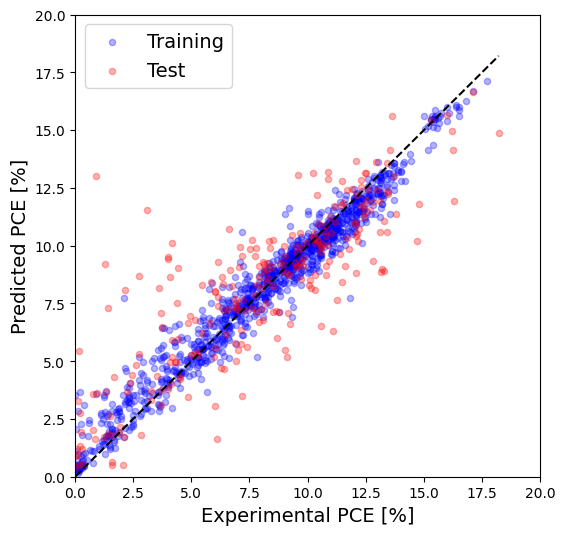

In [28]:
plot_prediction(y_train.values.flatten(), prd_train, y_test.values.flatten(), prd_test)

### 特徴量の重要度

In [29]:
# ベストなモデルを取得
best_model = model.best_estimator_

# 特徴の重要度を取得
importance = best_model.feature_importances_

In [30]:
importance

array([4.91409223e-05, 5.73790490e-04, 2.83690575e-05, ...,
       2.44707650e-02, 1.43467285e-02, 2.14426541e-02])

In [31]:
# 特徴量の重要度を降順にソート
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = np.array(x_all.columns)[sorted_indices]

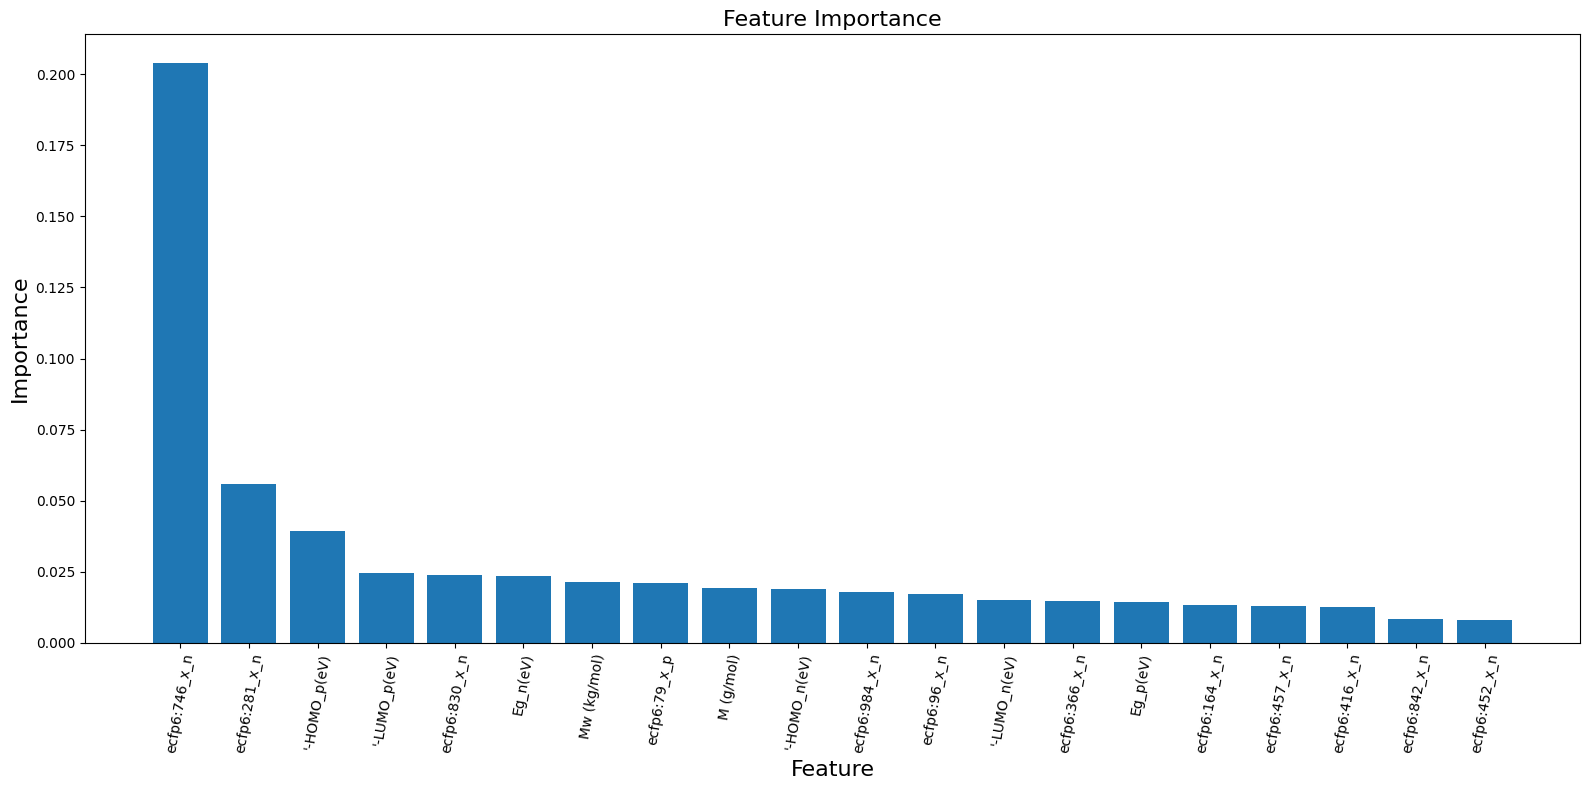

In [32]:
# ソートされた特徴量の重要度を表示

plt.figure(figsize=(16,8))
plt.title("Feature Importance",fontsize = 16)

plt.bar(range(len(sorted_importance[:20])), sorted_importance[:20], align='center')

plt.xticks(range(len(sorted_importance[:20])), sorted_feature_names[:20], rotation=80, fontsize = 10)

plt.xlabel("Feature",fontsize = 16)
plt.ylabel("Importance",fontsize = 16)
plt.tight_layout()
plt.show()